In [1]:
from estnltk import Text

from estnltk.taggers import DateTagger
from pandas import read_csv
from estnltk.taggers import RegexTagger

In [2]:
with open("examples_.txt", "r") as fin:
    lines = fin.readlines()
lines = [line.strip() for line in lines]    

In [3]:
lines

['PSA 03042012 - 0,83ng/ml perearsti poolt .',
 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va',
 'PSA 20105,99 ja 26.01.2012 uuesti .',
 'PSA 2011 oli 0 , 4 nG7ml .',
 'PSA 201222,25ng/ml',
 'PSA 2 aastajooksuldünaamikata , eriuuring',
 ':psa 16,81! ! ! ! ! ,',
 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )',
 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a',
 'Kolesterool 1k aastas .',
 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni',
 'Kontr Verekol 08.12a Per-le juurde .',
 's vas munajuha kasvaja op , günekol 3a tagssi .',
 '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .',
 'Rütmihäire tsüklipikkus 330 msek',
 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.',
 'Põhjendus: PALAT 10 # ALAT maksanäitaja',
 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .',
 'PSA 8,5( püsib aastaid selles väärtus',
 'S , P-PSA 4.130( <4.100 µg/L )',
 'PSA 5,2.',
 'Kolesterool oli 7,9 mmol/l 0',
 'kolesterool 6.4.',
 'Kolesterool 5,2 mmol/l - esialgu dieet .',
 'SK 3900 g , S

In [4]:
datetagger = DateTagger()
datetagger

In [5]:
vocabulary = 'regexes.csv'

In [6]:
vocabulary = read_csv(vocabulary, na_filter=False, index_col=False)

In [7]:
vocabulary

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value
0,((K|k)olesteroo?l|KOLESTEROOL|(K|k)olester|Chol|(K|k)olest?|kol|chol|CHol|CHL|KOL|Kol|cHOL|CHOL|ÜK|ük|Ük),0,1,,measurement_object,kolesterool
1,((mmoo?l?i?|mm|MMOL|mol)(\s*[-/]\s*(L|l))?|MMOL/L),0,1,,unit,chol_unit
2,"([0-9])+(\s?[,.]\s?[0-9]+)?",0,1,,number,whatever
3,"(psa|Psa|S-PSA|[Pp]rostataspetsiifiline\s*antigeen(\s*seerumis)?|PSA|(S\s*,\s*P-)?(\s*PSA))",0,1,,measurement_object,psa
4,(ng/mL|ng/L|mk(ro)?g/[Ll]|ng/\s*ml|ng7ml|mg/ml|ng\\ml|ng/l|ug/L|ngIml|µg/L|mcg/L|ng/mg),0,1,,unit,psa_unit
5,(a[. ]|aasta|kuu|nädal|[Xx]|kord),0,2,,rubbish,trashy_trash
6,(((S|s)iinus)?r.tm(iline|ilised)?|[Ff]rekv?(ents)?|fr\.?|Fr|BPM|bpm|SR|SLS|FR|HR|(P|p)ulss(i)?|Ps)(\s*[xX]\s*)?,0,1,,measurement_object,pulss
7,(([12][0-9]{2})|([3-9][0-9])),0,1,,number,some_int
8,(((l|x|X|lööki))\s*/?\s*(1\s*)?min(utis)?)|/min|x['´`]|bpm|BPM,0,1,,unit,pulss_unit
9,((([Ss]ünni)|([Kk]eha))?(p|P)ikkus|PIKKUS|pikkusega|[^A-Z]SP|sp|pikk|kasv|Kasv),0,1,,measurement_object,pikkus


In [8]:
test_regex_tagger = RegexTagger(vocabulary=vocabulary[:17],
                                        attributes=['regex_type', 'value'],
                                        conflict_resolving_strategy='MAX',
                                        overlapped=False,
                                        layer_name='type')

In [9]:
spaces = vocabulary[17:22]

In [10]:
spaces

,_regex_pattern_,_group_,_priority_,normalized,regex_type,value
17,[-=.>< ]*,0,1,,space,space
18,\.?\s*-?\s*,0,1,,space,space
19,[-=.>< ]*(on|oli)\s*,0,1,,space,space
20,\s*-?:?\s*\<?,0,1,,space,space
21,\s*,0,1,,space,space


In [11]:
space_tagger = RegexTagger(vocabulary = spaces,
                        attributes = ['normalized'],
                        conflict_resolving_strategy='MAX',
                        overlapped=False,
                        layer_name='space'
                         )

In [12]:
from estnltk.spans import Span, SpanList
from estnltk.layer import Layer

In [13]:
def tag_random_text(tagged_line):
    '''
    Tags everything that has not been tagged yet as random_text_layer
    '''
    
    
    other = []
    for i in tagged_line.space:
        space_range = list(range(i.start, i.end))
        other += space_range

    for i in tagged_line.type:
        type_range = list(range(i.start, i.end))
        other += type_range
    for i in tagged_line.dates:
        date_range = list(range(i.start, i.end))
        other += date_range
        
    text = ''
    text_started = False
    text_ranges = []
    text_texts = []
    for idx, i in enumerate(tagged_line.text):
        if idx not in other:
            text += i
            if text_started == False:
                text_start = idx
                text_started = True

        else:
            text_end = idx
            text_started = False  
            if text_started == False:
                if len(text) > 0:
                    text_ranges.append((text_start, text_end))
                    text_texts.append(text)   
                    text = ''
                    
    layer = Layer(name = 'random_text_layer', attributes = ['no_idea'])
    for span in text_ranges:
        sp = Span(start = span[0], end = span[1])
        sp.no_idea = 'text'
        layer.add_span(sp)
    test_thing = tagged_line    
    test_thing['random_text_layer'] = layer
    
    return test_thing

In [14]:
tagged_lines = []
lines_to_texts = {}
for line in lines:
    print(line)
    text = Text(line)
    test_regex_tagger.tag(text)
    datetagger.tag(text)
    space_tagger.tag(text)
    t = tag_random_text(text)
    tagged_lines.append(t)
    lines_to_texts[line] = t

PSA 03042012 - 0,83ng/ml perearsti poolt .
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
PSA 20105,99 ja 26.01.2012 uuesti .
PSA 2011 oli 0 , 4 nG7ml .
PSA 201222,25ng/ml
PSA 2 aastajooksuldünaamikata , eriuuring
:psa 16,81! ! ! ! ! ,
Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )
loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a
Kolesterool 1k aastas .
Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni
Kontr Verekol 08.12a Per-le juurde .
s vas munajuha kasvaja op , günekol 3a tagssi .
08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .
Rütmihäire tsüklipikkus 330 msek
Loote pikkus :   3 mm - vastab  5 nädalat 6 päeva.
Põhjendus: PALAT 10 # ALAT maksanäitaja
ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .
PSA 8,5( püsib aastaid selles väärtus
S , P-PSA 4.130( <4.100 µg/L )
PSA 5,2.
Kolesterool oli 7,9 mmol/l 0
kolesterool 6.4.
Kolesterool 5,2 mmol/l - esialgu dieet .
SK 3900 g , SP 51 cm .
Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .
Kehakaal 80,2 kg , KMI 25,9
S , P-NT-proBNP 668 ( <125 p

In [15]:
for line in tagged_lines:
    print(line.text)
    print(line.dates)
    print(line.regex_type)
    print(line.random_text_layer)
    print('--------------')

PSA 03042012 - 0,83ng/ml perearsti poolt .
SL[Span(2012, {'groups': "{'LONGYEAR': '2012'}", 'extracted_values': None, 'date_text': '2012', 'type': 'partial_date', 'probability': '0.4'})]
['measurement_object', 'number', 'number', 'unit']
SL[Span(perearsti, {'no_idea': 'text'}),
Span(poolt, {'no_idea': 'text'})]
--------------
PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va
SL[Span(10. 3, {'groups': "{'DAY': '10', 'MONTH': '3'}", 'extracted_values': None, 'date_text': '10. 3', 'type': 'partial_date', 'probability': '0.3'}),
Span(12. 1, {'groups': "{'DAY': '12', 'MONTH': '1'}", 'extracted_values': None, 'date_text': '12. 1', 'type': 'partial_date', 'probability': '0.3'})]
['measurement_object', 'number', 'unit', 'measurement_object', 'number', 'number', 'unit', 'rubbish']
SL[Span(,, {'no_idea': 'text'}),
Span(,, {'no_idea': 'text'}),
Span(B, {'no_idea': 'text'})]
--------------
PSA 20105,99 ja 26.01.2012 uuesti .
SL[Span(2010, {'groups': "{'LONGYEAR': '2010'}", 'extracted_values': None, 

# GRAMMAR

(MO = measurement_object)

MEASUREMENT = MO_DATE_NUMBER_UNIT<br>
MEASUREMENT = MO_DATE_NUMBER<br>
MEASUREMENT = MO_NUMBER_UNIT<br>
MEASUREMENT = MO_NUMBER<br>
TRASH = MO_NUMBER_RUBBISH<br>
TRASH = RUBBISH_NUMBER<br>
TRASH = RUBBISH_MO_NUMBER<br>
TRASH = RUBBISH<br>
TRASH = MO_DATE

In [16]:
from estnltk.finite_grammar.trees import Rule, Grammar

rules = []            
rules.append(Rule('MEASUREMENT', 'MO DATE NUMBER UNIT'))
rules.append(Rule('MEASUREMENT', 'MO DATE NUMBER'))
rules.append(Rule('MEASUREMENT', 'MO NUMBER UNIT'))
rules.append(Rule('MEASUREMENT', 'MO NUMBER'))
rules.append(Rule('TRASH', 'MO NUMBER RUBBISH'))
rules.append(Rule('TRASH', 'RUBBISH NUMBER'))
rules.append(Rule('TRASH', 'RUBBISH MO NUMBER'))
rules.append(Rule('TRASH', 'RUBBISH'))
rules.append(Rule('TRASH', 'MO DATE'))

grammar = Grammar(start_symbol=['MEASUREMENT', 'TRASH'], rules=rules)
grammar


Grammar:
	start: MEASUREMENT, TRASH
	terminals: DATE, MO, NUMBER, RUBBISH, UNIT
	nonterminals: MEASUREMENT, TRASH
Rules:
	MEASUREMENT -> MO DATE NUMBER UNIT	: 4
	MEASUREMENT -> MO DATE NUMBER	: 3
	MEASUREMENT -> MO NUMBER UNIT	: 3
	MEASUREMENT -> MO NUMBER	: 2
	TRASH -> MO NUMBER RUBBISH	: 3
	TRASH -> RUBBISH NUMBER	: 2
	TRASH -> RUBBISH MO NUMBER	: 3
	TRASH -> RUBBISH	: 1
	TRASH -> MO DATE	: 2

In [17]:
from estnltk.finite_grammar import phrase_list_generator

for phrase in phrase_list_generator(grammar, depth=3):
    print(phrase)

['MO', 'DATE', 'NUMBER', 'UNIT', 'MO', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'DATE', 'NUMBER', 'MO', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'DATE', 'NUMBER', 'RUBBISH']
['MO', 'DATE', 'NUMBER', 'MO', 'DATE']
['MO', 'NUMBER', 'UNIT', 'MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'UNIT', 'RUBBISH']
['MO', 'NUMBER', 'UNIT', 'MO', 'DATE']
['MO', 'NUMBER', 'MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'RUBBISH', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH', 'MO', 'NUMBER']
['MO', 'NUMBER', 'RUBBISH']
['MO', 'NUMBER', 'MO', 'DATE']


PSA 20105,99 ja 26.01.2012 uuesti .


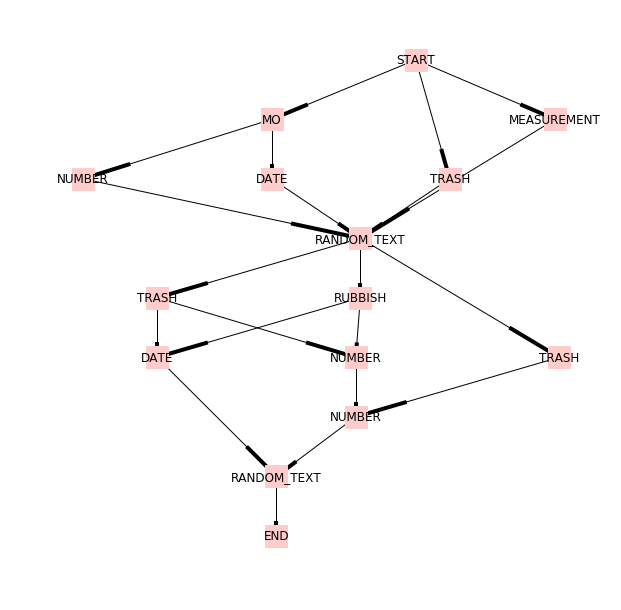

In [18]:
import networkx as nx
from estnltk.spans import Span
from estnltk.layer_operations.consecutive import iterate_consecutive_spans
from estnltk.finite_grammar.trees import Node, plot_graph, parse_graph, START, END, add_blanks


convert = {'measurement_object': 'MO',
           #'space': 'S',
           'number': 'NUMBER',
           'unit':'UNIT',
           'trash':'TRASH',
           'rubbish':'RUBBISH',
          }

def node_from_span(span):
    if span.layer:
        if span.layer.name == 'type':
            name = convert[span.regex_type]
        elif span.layer.name == 'dates':
            name = 'DATE'
        elif span.layer.name == 'random_text_layer':
            name = 'RANDOM_TEXT'
    else:
        name = span.name    
    node = Node(name, span.start, span.end, spans=span)
    return node

graph = nx.DiGraph()

start_span = Span(-11, -10)
start_span.name = 'START'
end_span = Span(100000000, 100000001)
end_span.name = 'END'


def parse_text(text):
    graph = nx.DiGraph()
    spans = list(text.type) + list(text.dates) + list(text.random_text_layer) + [start_span, end_span]
    for a, b in iterate_consecutive_spans(spans):
        graph.add_edge( node_from_span(a), node_from_span(b))

    graph = parse_graph(graph, grammar, 10)
    print(text.text)
    plot_graph(graph)
    return graph

parse_text(tagged_lines[2])

In [19]:
import ipywidgets as widgets


text_selection = widgets.Dropdown(
    options=lines,
    description='Text:',
)

def observe(change):
    out.clear_output()
    with out:
        line = change['new']
        parse_text(lines_to_texts[line])


text_selection.observe(observe, names='value')

out = widgets.Output()

display(text_selection, out)

Dropdown(description='Text:', options=('PSA 03042012 - 0,83ng/ml perearsti poolt .', 'PSA 2010. 3ng/ml, PSA 2012. 1,53ng/ml . - Bx va', 'PSA 20105,99 ja 26.01.2012 uuesti .', 'PSA 2011 oli 0 , 4 nG7ml .', 'PSA 201222,25ng/ml', 'PSA 2 aastajooksuldünaamikata , eriuuring', ':psa 16,81! ! ! ! ! ,', 'Happe-aluse tasakaal 6.0 ( 5.0 .. 8.0 )', 'loli 25 mgx1 ja Monoprili 10 mg Kolesterool 2011a', 'Kolesterool 1k aastas .', 'Kõrgenenud kolesterool 2a ( mõõdetud ). Ei pea dieetist kinni', 'Kontr Verekol 08.12a Per-le juurde .', 's vas munajuha kasvaja op , günekol 3a tagssi .', '08.11.2010 PSA 13.12.2011 7,2ng/ml PSADT on väike .', 'Rütmihäire tsüklipikkus 330 msek', 'Loote pikkus : \xa0 3 mm - vastab\xa0 5 nädalat 6 päeva.', 'Põhjendus: PALAT 10 # ALAT maksanäitaja', 'ärme vähk 2007 aastast cT3N0M0PSA 59ng/ml .', 'PSA 8,5( püsib aastaid selles väärtus', 'S , P-PSA 4.130( <4.100 µg/L )', 'PSA 5,2.', 'Kolesterool oli 7,9 mmol/l 0', 'kolesterool 6.4.', 'Kolesterool 5,2 mmol/l - esialgu dieet .', 'SK 3900 g , SP 51 cm .', 'Lapse kaal 5,4 kg/82 mg/0,82 ml i/m .', 'Kehakaal 80,2 kg , KMI 25,9', 'S , P-NT-proBNP 668 ( <125 pg/mL ) S , P-Albumiin 43 ( 35 .. 52 g/L ) S , P-ALAT 25 ( <33 U/L )', 'PSA 6,5 ng/ml, eesnäärme maht67cm3', 'rjeldus : Siinusbradükardia Fr 587min'), value='PSA 03042012 - 0,83ng/ml perearsti poolt .')

Output()